<a href="https://colab.research.google.com/github/seanreed1111/colab-demos/blob/master/TruncatedExponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyro-ppl=='1.8.0'

     |████████████████████████████████| 713 kB 13.2 MB/s 


modeled on: 
- https://github.com/pyro-ppl/pyro/blob/dev/pyro/distributions/multivariate_studentt.py
- https://github.com/pyro-ppl/pyro/blob/dev/pyro/distributions/logistic.py
- https://github.com/pyro-ppl/pyro/blob/dev/pyro/distributions/inverse_gamma.py
- https://stats.stackexchange.com/questions/508749/generating-random-samples-obeying-the-exponential-distribution-with-a-given-min

In [2]:
import pyro.distributions as dist
from torch.distributions.utils import broadcast_all
import matplotlib.pyplot as plt
import seaborn as sns

def TruncatedExponential(lb, ub, rate=1.0):
    lb, ub, rate = broadcast_all(lb, ub, rate)
    return dist.TransformedDistribution(
        dist.Uniform((-rate * ub).exp(), (-rate * lb).exp()),
        [dist.transforms.ExpTransform().inv,
         dist.transforms.AffineTransform(loc=0, scale=-1/rate)]
    )


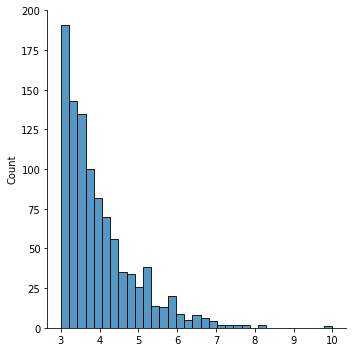

In [3]:
d = TruncatedExponential(3, 10, 1.0).sample([1000])
sns.displot(data=d)

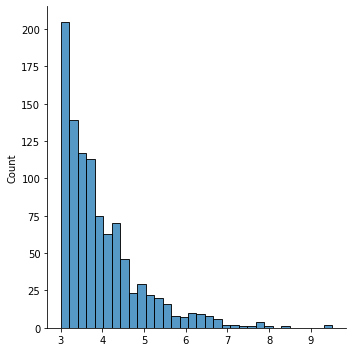

In [5]:
d = TruncatedExponential(3, 10, 1.0).rsample([1000])
sns.displot(data=d);